# Breach Forums

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("users.csv")
#timestamps Unix datetime
for col in ["regdate", "lastactive", "lastvisit", "lastpost"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], unit="s", errors="coerce")
# Métrica actividad
df["total_activity"] = df["postnum"] + df["threadnum"]


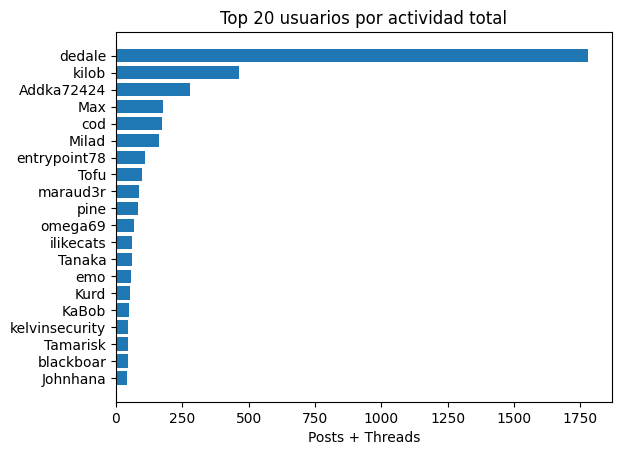

In [5]:
#TopUsers
top_users = df.sort_values("total_activity", ascending=False).head(20)
plt.barh(top_users["username"], top_users["total_activity"])
plt.gca().invert_yaxis()
plt.title("Top 20 usuarios por actividad total")
plt.xlabel("Posts + Threads")
plt.show()



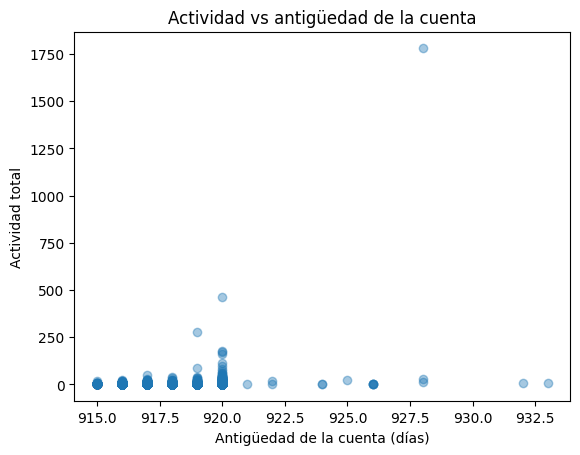

In [6]:
#Actividad vs antigüedad (comportamiento longitudinal)
df["account_age_days"] = (pd.Timestamp.now() - df["regdate"]).dt.days
plt.scatter(df["account_age_days"], df["total_activity"], alpha=0.4)
plt.xlabel("Antigüedad de la cuenta (días)")
plt.ylabel("Actividad total")
plt.title("Actividad vs antigüedad de la cuenta")
plt.show()


In [24]:
#email
df["email_domain"] = (
    df["email"]
    .astype("string")
    .str.lower()
    .str.split("@", n=1)
    .str[1]
)
email_domains = df["email_domain"].dropna()
email_domains.value_counts().head(20)


email_domain
gmail.com         2070
proton.me          764
protonmail.com     392
yahoo.com          353
dnmx.org           152
outlook.com         84
courvix.com         66
hotmail.com         56
tutanota.com        41
riseup.net          38
cock.li             35
onionmail.org       32
tuta.io             19
qq.com              19
protonmail.ch       15
criminal.li         12
163.com             11
onionmail.com        7
yandex.com           6
null.null            5
Name: count, dtype: int64

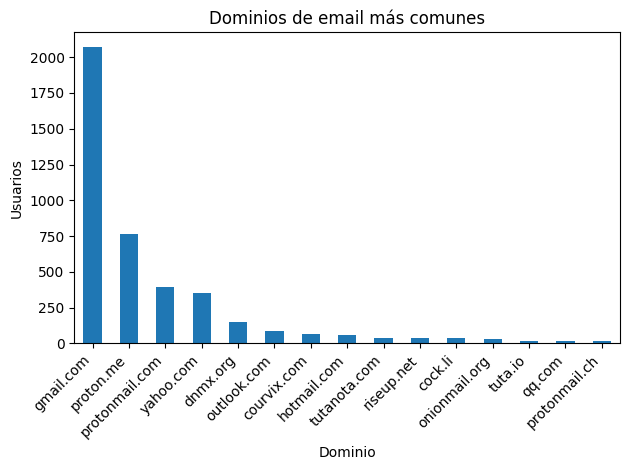

In [25]:
email_domains.value_counts().head(15).plot(kind="bar")
plt.title("Dominios de email más comunes")
plt.ylabel("Usuarios")
plt.xlabel("Dominio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [26]:
df["birthday"] = df["birthday"].astype("string")

# Nos quedamos solo con los que tienen 3 partes (DD-MM-YYYY)
valid_bday = df["birthday"].str.count("-") == 2

df["birthday_parsed"] = pd.to_datetime(
    df.loc[valid_bday, "birthday"],
    format="%d-%m-%Y",
    errors="coerce"
)



In [29]:
#edadactual
today = pd.Timestamp.today().normalize()

df["age"] = (
    (today - df["birthday_parsed"])
    .dt.days // 365
)


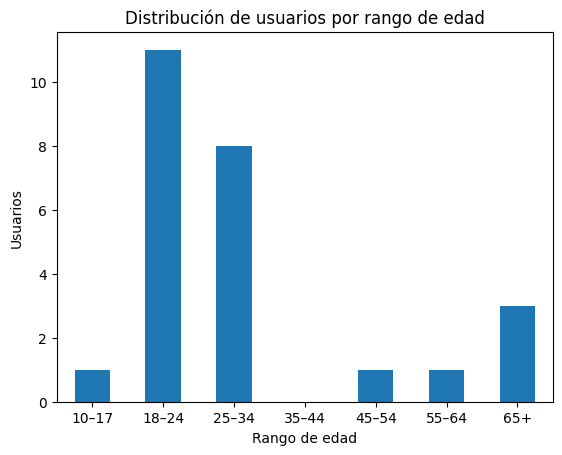

In [34]:
#filtro para evitar fakes descarados
df_age = df[
    (df["age"] >= 10) &
    (df["age"] <= 100)
].copy()
#defrangos
age_bins = [10, 18, 25, 35, 45, 55, 65, 100]
age_labels = [
    "10–17", "18–24", "25–34", "35–44",
    "45–54", "55–64", "65+"
]

df_age["age_range"] = pd.cut(
    df_age["age"],
    bins=age_bins,
    labels=age_labels,
    right=False
)
df_age["age_range"].value_counts().sort_index()
df_age["age_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribución de usuarios por rango de edad")
plt.ylabel("Usuarios")
plt.xlabel("Rango de edad")
plt.xticks(rotation=0)
plt.show()


/tmp/ipykernel_63868/4194283545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby("age_range")["postnum"].mean().plot(kind="bar")


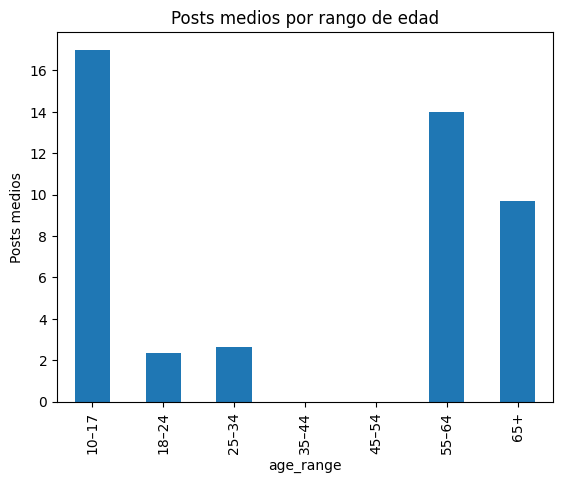

In [35]:
df_age.groupby("age_range")["postnum"].mean().plot(kind="bar")
plt.title("Posts medios por rango de edad")
plt.ylabel("Posts medios")
plt.show()
